In [1]:
using LsqFit
using Plots
using NPZ
using Distributions


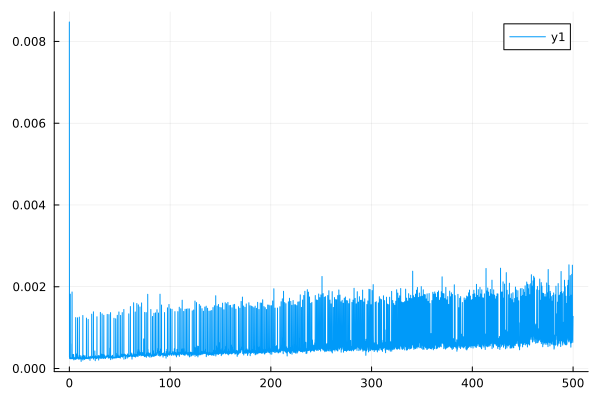

In [44]:
start = -5
ending = 5
gran1 = 100
gran2 = 1000
X = range(start, ending, gran1)
params = (2.5, 1.3)
f(x, a, b) = a * exp(-b * x)
model(x, p) = p[1] * exp.(-p[2] .* x)
X1 = range(start, ending, gran2)

times = []
sses = []
noise = 0:0.1:500
iterations = 20

for n in noise
    times1 = []
    sses1 = []
    for i in 1:iterations
        Y = f.(X, params...) + rand(Normal(0, n), length(X))
        
        startTime = time()
        fit = curve_fit(model, X, Y, [1.0, 1.0])
        endTime = time()
        predCF = model(X1, fit.param)
        push!(sses1, sum((f.(X1, params...) - predCF) .^ 2))
        push!(times1, endTime - startTime)
    end
    push!(times, mean(times1))
    push!(sses, mean(sses1))
end

plot(noise, times)

# Generate noisy data
# model(x, p) = p[1] * exp.(-p[2] .* x)
# p0 = [1.0, 1.0]
# fit = curve_fit(model, X, Y, p0)
# @time curve_fit(model, xvals, yvals, p0)
# @show sum([(p - a)^2 for (p, a) in zip(model(x1vals, fit.param), model(x1vals, [2.5, 1.3]))])
# println("Estimated parameters: ", fit.param)

# plot(xvals, yvals, seriestype=:scatter, label="data")
# plot!(xvals, model(xvals, fit.param), label="fit")
# xlabel!("x")
# ylabel!("y")
# title!("Nonlinear least squares fit")


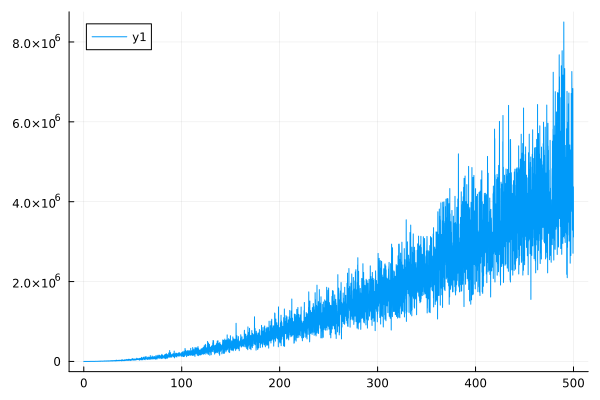

In [45]:
plot(noise, sses)

In [ ]:
start = 0
ending = 1000000
gran1 = 10000000
X = range(start, ending, gran1)
params = (2.5, 1.3)
f(x, a, b) = a * sin(-b * x)
model(x, p) = p[1] * sin.(-p[2] .* x)
iterations = 1

times = []
sses = []
noise = 10
lengths = range(start, ending, gran1)

for i in 7:7
    times1 = []
    sses1 = []
    X1 = X[1:10^i]
    for i in 1:iterations
        Y = f.(X1, params...) + rand(Normal(0, noise), length(X1))
        
        startTime = time()
        fit = curve_fit(model, X1, Y, [1.0, 1.0])
        endTime = time()
        # predCF = model(X1, fit.param)
        # push!(sses1, sum((f.(X1, params...) - predCF) .^ 2))
        push!(times1, endTime - startTime)
    end
    push!(times, mean(times1))
    # push!(sses, mean(sses1))
end

plot([10^i for i in 7:7], times)


In [12]:
plot([10^i for i in 1:6], times, xscale=:log10)

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6